<a href="https://colab.research.google.com/github/cstecker/politicsRLab/blob/main/Analyse%20von%20VAA-Daten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyse von VAA-Daten**

## **Setup**
Zu Beginn laden wir die Pakete, die wir benötigen.

In [2]:
library(tidyverse)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Sodann laden wir die Datensätze

In [3]:
# Datensatz herunterladen
download.file(
  url = "http://getoutthevote-darmstadt.de/upload/voto2024-partyposthesen.xlsx?raw=true",
  destfile = "voto2024partypos.xlsx"
  )

# Datensatz in R einbinden
partypos <- read_excel("voto2024partypos.xlsx")

**Voto für die Kommunalwahlen 2024**



In [4]:
glimpse(partypos)

Rows: 3,043
Columns: 10
$ gmd_name     <chr> "Mannheim", "Mannheim", "Mannheim", "Mannheim", "Mannheim…
$ gmd_key      <chr> "08222000", "08222000", "08222000", "08222000", "08222000…
$ these_id     <chr> "local_7", "local_7", "local_7", "local_7", "local_7", "l…
$ these_title  <chr> "Nationaltheater", "Nationaltheater", "Nationaltheater", …
$ statement    <chr> "An der Nationaltheater-Sanierung wird festgehalten, egal…
$ statement2   <chr> "An der Nationaltheater-Sanierung wird festgehalten, egal…
$ party        <chr> "Freie Wähler-ML", "DIE MANNHEIMER", "MfM", "KLIMALISTE",…
$ valuation    <dbl> 75, 0, 0, 25, 25, 75, 75, 75, 50, 50, 75, 25, 0, 100, 0, …
$ position_str <chr> "Zustimmung", "Starke Ablehnung", "Starke Ablehnung", "Ab…
$ explanation  <chr> "keine Begründung angegeben", "Das Nationaltheater ist ei…


Schließlich können wir auch die oft vertraute "Excel-Perspektive" konsultieren (dazu spielen wir mal verschiedene Filter durch):

In [ ]:
partypos %>%
  filter(party == "SPD")

In [ ]:
partypos %>%
  filter(gmd_name == "Halle")

In [ ]:
partypos %>%
  filter(these_title == "Wahlalter zur Kommunalwahl")

In [ ]:
partypos %>%
  filter(str_detect(these_title, "Wahl"))

**Darstellung von Parteipositionen**

In [18]:
# Parteifarben definieren
partycolors <- c(
  "CDU" = "black",
  "SPD" = "red",
  "FDP" = "yellow",
  "AfD" = "blue",
  "DIE LINKE" = "darkred",
  "Grüne" = "green",
  "Freie Wähler" = "lightblue",
  "Volt" = "#502379")

In [ ]:
partypos %>%
  count(party, sort = TRUE)

In [ ]:
pos_wahlalter <- partypos %>%
  filter(party %in% c("CDU", "SPD", "FDP", "AfD", "FDP", "DIE LINKE", "Grüne", "Freie Wähler", "Volt")) %>%
  filter(these_title == "Wahlalter zur Kommunalwahl")

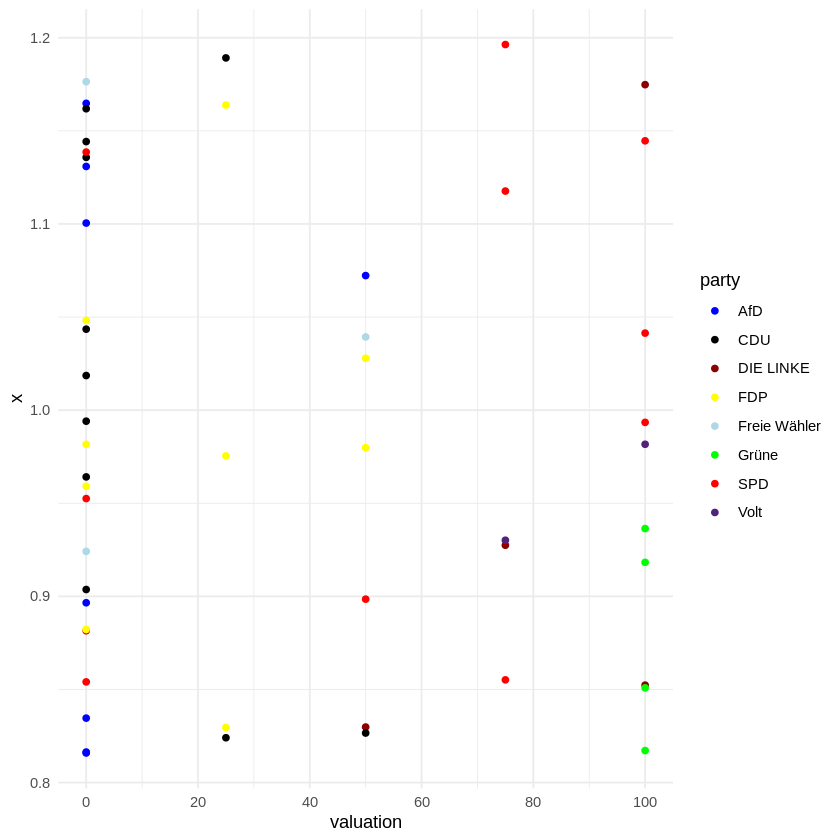

In [19]:
# Wie stehen die Parteien zum Wahlrecht für Nicht-EU-Ausländer
partypos %>%
  filter(party %in% c("CDU", "SPD", "FDP", "AfD", "DIE LINKE", "Grüne", "Freie Wähler", "Volt")) %>%
  filter(these_title == "Wahlrecht für Nicht-EU-Ausländer") %>%
  ggplot(aes(x = 1, y = valuation, color = party)) +
  geom_jitter(width = .20, height = 0) +
  scale_y_continuous(limits = c(0, 100),
                     breaks = seq(0, 100, 20)) +
  scale_color_manual(
    values = partycolors
  ) +
  coord_flip() +
  theme_minimal()

In [ ]:
# Wie stehen die Parteien zum Wahlrecht für Nicht-EU-Ausländer?